In [65]:
import pandas as pd
import numpy as np
import random
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import defaultdict


# Load pre-COVID dataset
pre_covid_data = pd.read_csv('precovid_dataset.csv')
print(pre_covid_data)

# Load post-COVID dataset
post_covid_data = pd.read_csv('postcovid_dataset.csv')
print(post_covid_data)


            Date         Open         High          Low        Close  \
0       1/2/2015  2058.899902  2072.360107  2046.040039  2058.199951   
1       1/5/2015  2054.439941  2054.439941  2017.339966  2020.579956   
2       1/6/2015  2022.150024  2030.250000  1992.439941  2002.609985   
3       1/7/2015  2005.550049  2029.609985  2005.550049  2025.900024   
4       1/8/2015  2030.609985  2064.080078  2030.609985  2062.139893   
...          ...          ...          ...          ...          ...   
1232  11/22/2019  3111.409912  3112.870117  3099.260010  3110.290039   
1233  11/25/2019  3117.439941  3133.830078  3117.439941  3133.639893   
1234  11/26/2019  3134.850098  3142.689941  3131.000000  3140.520020   
1235  11/27/2019  3145.489990  3154.260010  3143.409912  3153.629883   
1236  11/29/2019  3147.179932  3150.300049  3139.340088  3140.979980   

        Adj Close      Volume  
0     2058.199951  2708700000  
1     2020.579956  3799120000  
2     2002.609985  4460110000  
3     2

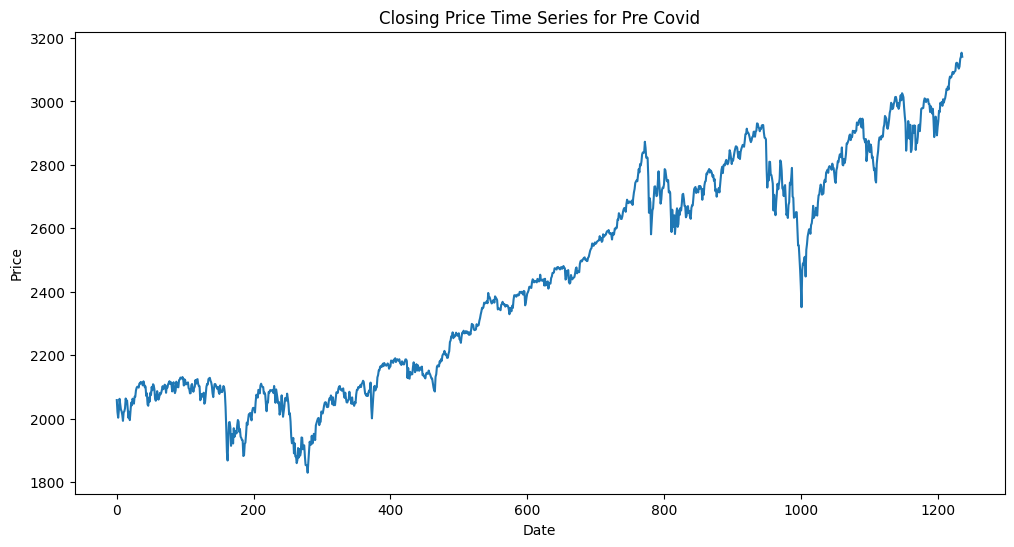

In [66]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(pre_covid_data["Close"], label="Close Price")
plt.title("Closing Price Time Series for Pre Covid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


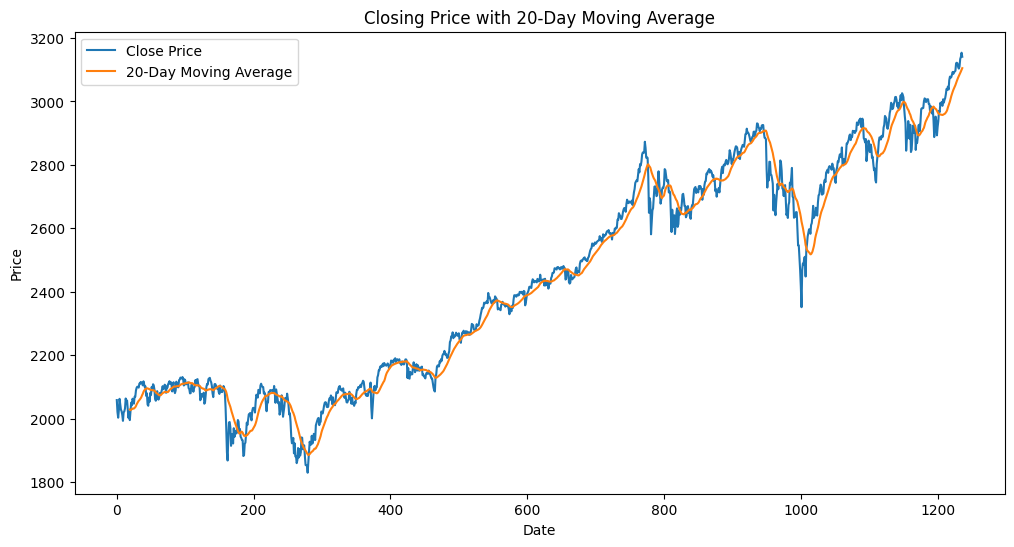

In [67]:
# Calculate a 20-day moving average
pre_covid_data["MA20"] = pre_covid_data["Close"].rolling(window=20).mean()

# Plot the closing price with the moving average
plt.figure(figsize=(12, 6))
plt.plot(pre_covid_data["Close"], label="Close Price")
plt.plot(pre_covid_data["MA20"], label="20-Day Moving Average")
plt.title("Closing Price with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

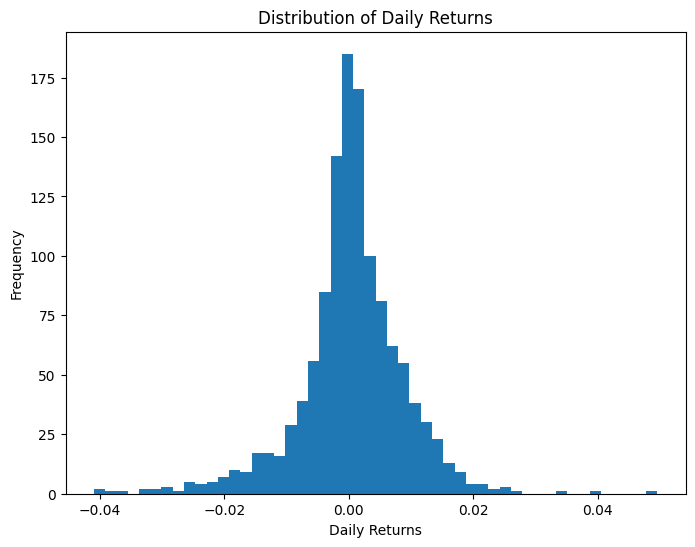

Volatility: 0.008514479235391084


In [68]:
# Calculate daily returns
pre_covid_data["Returns"] = pre_covid_data["Close"].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(8, 6))
plt.hist(pre_covid_data["Returns"], bins=50)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

# Calculate volatility (standard deviation of returns)
volatility = pre_covid_data["Returns"].std()
print("Volatility:", volatility)

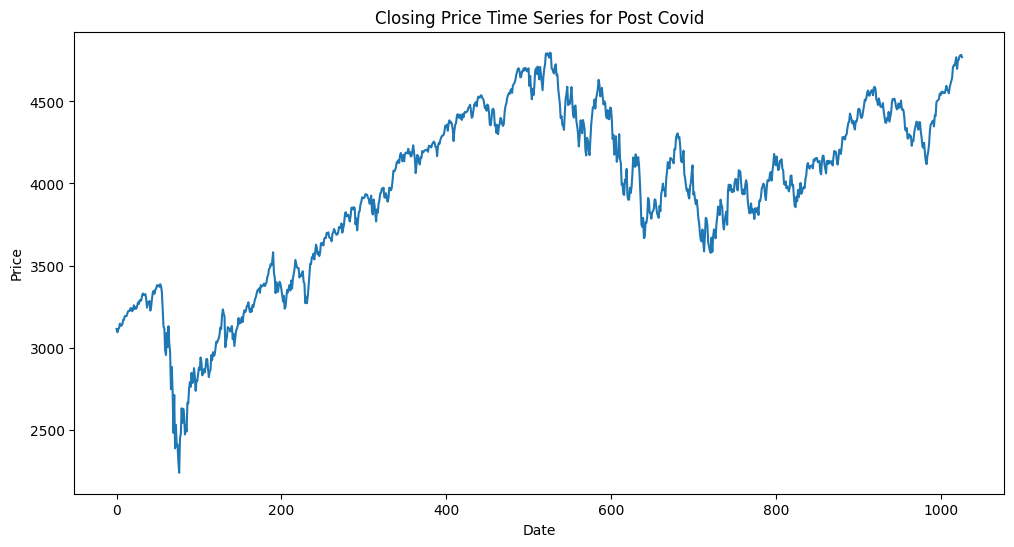

In [69]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(post_covid_data["Close"], label="Close Price")
plt.title("Closing Price Time Series for Post Covid")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


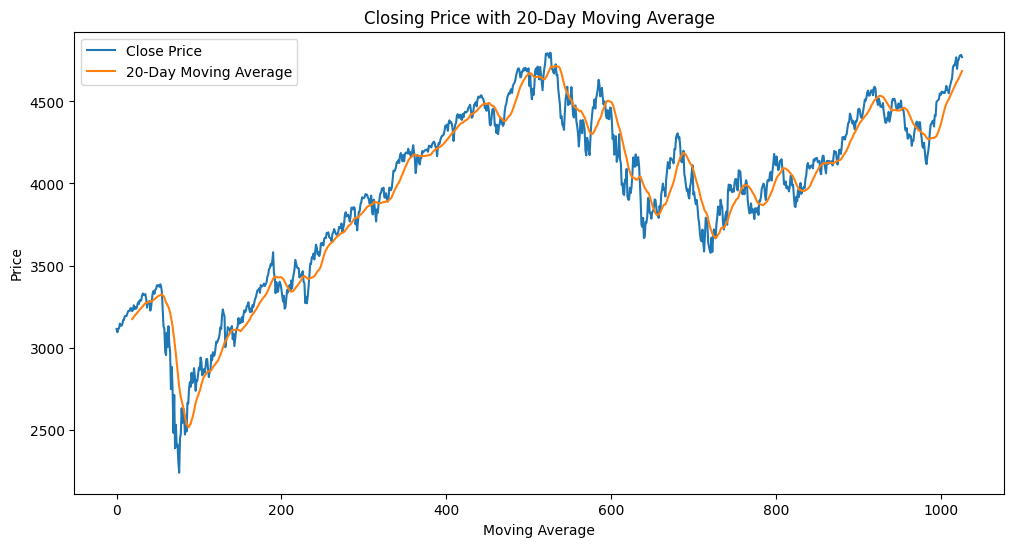

In [70]:
# Calculate a 20-day moving average
post_covid_data["MA20"] = post_covid_data["Close"].rolling(window=20).mean()

# Plot the closing price with the moving average
plt.figure(figsize=(12, 6))
plt.plot(post_covid_data["Close"], label="Close Price")
plt.plot(post_covid_data["MA20"], label="20-Day Moving Average")
plt.title("Closing Price with 20-Day Moving Average")
plt.xlabel("Moving Average")
plt.ylabel("Price")
plt.legend()
plt.show()

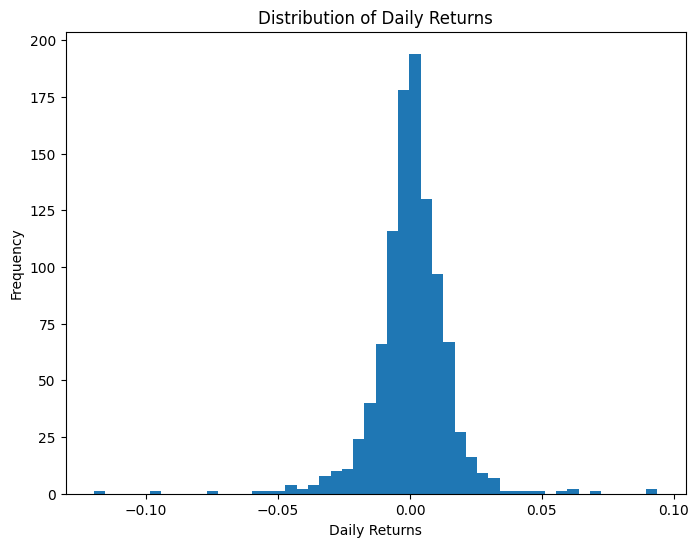

Volatility: 0.014363365476723799


In [71]:
# Calculate daily returns
post_covid_data["Returns"] = post_covid_data["Close"].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(8, 6))
plt.hist(post_covid_data["Returns"], bins=50)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.show()

# Calculate volatility (standard deviation of returns)
volatility = post_covid_data["Returns"].std()
print("Volatility:", volatility)

In [72]:
def calculate_descriptive_stats(data):

  # Check for necessary columns
  if 'Date' not in data.columns or 'Close' not in data.columns:
    raise ValueError("Data must have 'Date' and 'Close' columns")

  # Daily returns (percentage change)
  data['Returns'] = data['Close'].pct_change() * 100

  # Descriptive statistics
  descriptive_stats = data['Close'].describe(percentiles=[0.25, 0.75])
  descriptive_stats['Skewness'] = data['Close'].skew()
  descriptive_stats['Kurtosis'] = data['Close'].kurt()
  descriptive_stats['Volatility (Daily)'] = data['Returns'].std()
  descriptive_stats['Volatility (Annualized)'] = data['Returns'].std() * np.sqrt(252)  # Assuming 252 trading days

  return descriptive_stats

# Example usage (assuming you have your data loaded into a pandas DataFrame named 'data')
descriptive_stats = calculate_descriptive_stats(pre_covid_data)
print(descriptive_stats)

count                      1237.000000
mean                       2440.350193
std                         347.629586
min                        1829.079956
25%                        2100.399902
50%                        2429.010010
75%                        2752.060059
max                        3153.629883
Skewness                      0.148578
Kurtosis                     -1.375711
Volatility (Daily)            0.851448
Volatility (Annualized)      13.516317
Name: Close, dtype: float64


In [73]:
descriptive_stats_post = calculate_descriptive_stats(post_covid_data)
print(descriptive_stats_post)

count                      1027.000000
mean                       3950.712766
std                         530.606425
min                        2237.399902
25%                        3639.005005
50%                        4063.040039
75%                        4376.584961
max                        4796.560059
Skewness                     -0.712668
Kurtosis                     -0.190826
Volatility (Daily)            1.436337
Volatility (Annualized)      22.801136
Name: Close, dtype: float64


In [74]:
# Define the number of states and actions
num_states = 3
num_actions = 3
# Define the range for the random initialization
min_value = -0.01
max_value = 0.01

# Initialize the Q-table with random values
q_pretable = np.random.uniform(low=min_value, high=max_value, size=(num_states, num_actions))

# Print the initialized Q-table
for state in q_pretable:
    print(state)

[ 0.00731143 -0.00199942  0.00678437]
[-0.00223541  0.00198194  0.00701677]
[-0.00132876  0.00187528 -0.00888162]


In [75]:
# Initialize the Q-table with random values
q_posttable = np.random.uniform(low=min_value, high=max_value, size=(num_states, num_actions))


# Print the initialized Q-table
for state in q_posttable:
    print(state)

[ 0.00673198 -0.00711865 -0.00609378]
[ 0.00183704 -0.00296166  0.00070315]
[-0.00688265 -0.0001891  -0.00144367]


In [76]:
# Define the parameters
num_episodes_pre = len(pre_covid_data)

num_episodes_post =len(post_covid_data)


epsilon = 0.1  # Exploration rate
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor


In [77]:
# Define the environment
class StockMarketEnvironment:
    def __init__(self, data):
        self.data = data
        self.current_step = 0
        self.max_steps = len(data) - 1

    def reset(self):
        self.current_step = 0
        return self._get_state()

    def step(self, action):
        self.current_step += 1
        done = self.current_step >= self.max_steps
        next_state = self._get_state()
        reward = self._calculate_reward(action)
        return next_state, reward, done, {}

    def _get_state(self):
        # Calculate the change in closing price from the previous day
        current_close = self.data.iloc[self.current_step]['Close']
        prev_close = self.data.iloc[self.current_step - 1]['Close']
        price_change = current_close - prev_close

        if current_close > prev_close:
            return 1  # Price increased
        elif current_close < prev_close:

            return 0  # Price decreased
        else:
            return -1  # Price unchanged

    def _calculate_reward(self, action):
        # Get relevant data for current and next steps
        current_close = self.data.iloc[self.current_step]['Close']
        next_close = self.data.iloc[self.current_step - 1]['Close']

        # Calculate price change
        price_change = next_close - current_close

        # Calculate reward based on the action and price change
        if action == 0:  # Sell
          if price_change < 0:
            reward = 1  # Positive reward for selling before a price decrease
          else:
            reward = -1  # Negative reward for selling before or during a price increase

        elif action == 1: # Buy
          if price_change > 0:
            reward = 1  # Positive reward for buying before a price increase
          else:
            reward = 0  # Negative reward for buying before or during a price decrease

        else:  # Hold
          if price_change == 0:
            reward = 0  # Neutral reward for no price change
          else:
            reward = 0.1  # Small holding bonus for any price change


        return reward

In [78]:
# Create an instance of the environment for pre_covid
env_pre = StockMarketEnvironment(pre_covid_data)
reward=0
# Q-learning algorithm for Pre_covid
for episode in range(num_episodes_pre):
    state = env_pre.reset()  # Initial state
    done = False
    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_pretable[state, :])  # Exploit

        # Take action and observe next state and reward
        next_state, reward, done, _ = env_pre.step(action)

        # Update Q-value using Bellman equation
        q_pretable[state, action] = q_pretable[state, action] + alpha * (reward + gamma * np.max(q_pretable[next_state, :]) - q_pretable[state, action])


        # Update state
        state = next_state
print("Q-table for pre covid")
print(q_pretable)

Q-table for pre covid
[[3.89655572 4.10844076 4.00745944]
 [3.26765419 4.0688053  3.9534324 ]
 [5.4643279  4.44057627 4.52168671]]


In [79]:
# Create an instance of the environment for pre_covid
env_post = StockMarketEnvironment(post_covid_data)
reward=0

# Q-learning algorithm for Pre_covid
for episode in range(num_episodes_post):
    state = env_post.reset()  # Initial state
    done = False
    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_posttable[state, :])  # Exploit

        # Take action and observe next state and reward
        next_state, reward, done, _ = env_post.step(action)

        # Update Q-value using Bellman equation
        q_posttable[state, action] = q_posttable[state, action] + alpha * (reward + gamma * np.max(q_posttable[next_state, :]) - q_posttable[state, action])


        # Update state
        state = next_state
print("Q-table for post covid")
print(q_posttable)

Q-table for post covid
[[ 3.82486506e+00  4.61756502e+00  4.29879512e+00]
 [ 4.32666932e+00  4.49367090e+00  4.32085809e+00]
 [-6.88265467e-03 -1.89101342e-04 -1.44367464e-03]]


In [80]:
def analyze_q_tables(q_table_pre_covid, q_table_post_covid, states):


  state_changes = defaultdict(tuple)

  # Ensure states have the same length as Q-table entries
  if len(states) != len(q_table_pre_covid) or len(states) != len(q_table_post_covid):
    raise ValueError("Number of states must match Q-table entries")

  for i, state in enumerate(states):
    # Compare prevalent actions (highest Q-values) between Q-tables
    prevalent_action_pre_covid = np.argmax(q_table_pre_covid[i])
    prevalent_action_post_covid = np.argmax(q_table_post_covid[i])

    # Check for missing values in post-COVID Q-table
    if np.all(q_table_post_covid[i] == 0):
      print(f"Warning: Missing Q-values for state {state} in post-COVID Q-table")
    else:
      state_changes[state] = (prevalent_action_pre_covid, prevalent_action_post_covid)

  return state_changes

In [81]:
states=["Price Increase","Price Decrease","Price Unchanged"]

# Analyze Q-tables
state_changes = analyze_q_tables(q_pretable, q_posttable, states)
# Print results
print("Potential State-Action Changes:")
for state, (action_pre, action_post) in state_changes.items():
    print(f"State: {state}, Prevalent Action (Pre-COVID, Post-COVID): ({action_pre}, {action_post})")



Potential State-Action Changes:
State: Price Increase, Prevalent Action (Pre-COVID, Post-COVID): (1, 1)
State: Price Decrease, Prevalent Action (Pre-COVID, Post-COVID): (1, 1)
State: Price Unchanged, Prevalent Action (Pre-COVID, Post-COVID): (0, 1)


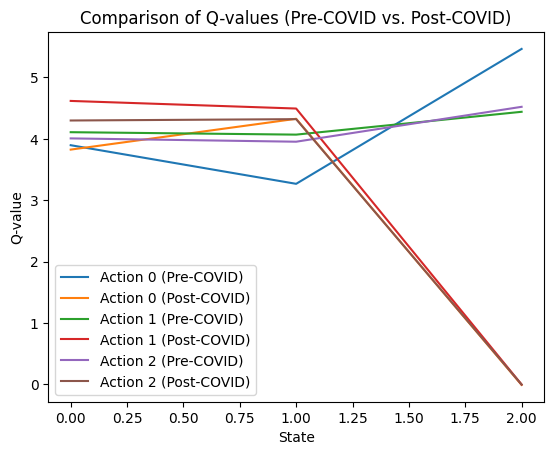

In [82]:
import matplotlib.pyplot as plt

# Assuming Q-tables are pre_qtable and post_qtable

num_states, num_actions = q_pretable.shape

# Plot Q-values for each action across all states
for action in range(num_actions):
  plt.plot(q_pretable[:, action], label=f"Action {action} (Pre-COVID)")
  plt.plot(q_posttable[:, action], label=f"Action {action} (Post-COVID)")

plt.xlabel("State")
plt.ylabel("Q-value")
plt.title("Comparison of Q-values (Pre-COVID vs. Post-COVID)")
plt.legend()
plt.show()

In [83]:
def compare_q_tables(q_table1, q_table2):
    # Ensure the Q-tables have the same dimensions
    assert q_pretable.shape == q_posttable.shape, "Q-tables must have the same dimensions"

    # Calculate the mean squared error (MSE)
    mse = np.mean(np.square(q_table1 - q_table2))

    return mse

mse = compare_q_tables(q_pretable, q_posttable)
print("MSE:", mse)

MSE: 7.988833280838668


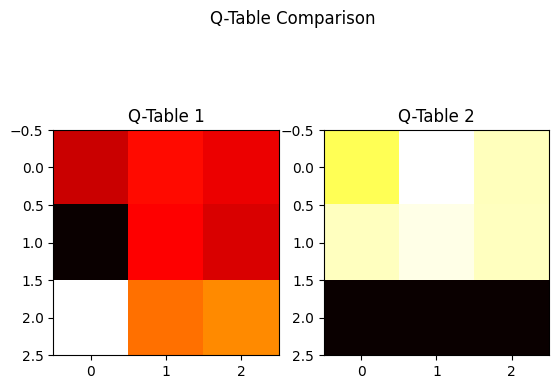

In [84]:
def visualize_q_tables(q_table1, q_table2):
    assert q_table1.shape == q_table2.shape, "Q-tables must have the same dimensions"
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Q-Table Comparison')
    axs[0].imshow(q_pretable, cmap='hot')
    axs[0].set_title('Q-Table 1')
    axs[1].imshow(q_posttable, cmap='hot')
    axs[1].set_title('Q-Table 2')
    plt.show()

visualize_q_tables(q_pretable,q_posttable)

In [85]:
def find_directional_changes(pre_covid_q_table, post_covid_q_table):
    assert pre_covid_q_table.shape == post_covid_q_table.shape, "Q-tables must have the same dimensions"

    directional_changes = {}

    # Iterate over states and actions
    for state in range(pre_covid_q_table.shape[0]):
        for action in range(pre_covid_q_table.shape[1]):
            pre_covid_q_value = pre_covid_q_table[state, action]
            post_covid_q_value = post_covid_q_table[state, action]

            # Compare Q-values
            if post_covid_q_value > pre_covid_q_value:
                change_direction = "positive change"
            elif post_covid_q_value < pre_covid_q_value:
                change_direction = "negative change"
            else:
                change_direction = "no significant change"

            # Record directional change
            directional_changes[(state, action)] = change_direction

    return directional_changes

In [86]:
changes = find_directional_changes(q_pretable, q_posttable)

# Print directional changes
for (state, action), change_direction in changes.items():
    print(f"State {state}, Action {action}: {change_direction}")

State 0, Action 0: negative change
State 0, Action 1: positive change
State 0, Action 2: positive change
State 1, Action 0: positive change
State 1, Action 1: positive change
State 1, Action 2: positive change
State 2, Action 0: negative change
State 2, Action 1: negative change
State 2, Action 2: negative change
